In [1]:
import SimpleITK as sitk
import numpy as np
import sys
sys.path.append('../../')

from scripts.Registration3D.registration import central_normalize_img, calculate_ct2us_transform

In [2]:
vessel_ct = sitk.ReadImage('vessel_ct.nii.gz')
vessel_ct = central_normalize_img(vessel_ct,150)


# The left-right order is different between the US image and CT image. We flip vessel_ct to make them consistent.
flipped_ct = sitk.Flip(vessel_ct,[True, False, False])
flipped_ct = sitk.GetImageFromArray(sitk.GetArrayFromImage(flipped_ct).astype(np.float64))
flipped_ct.SetOrigin(vessel_ct.GetOrigin())
flipped_ct.SetSpacing(vessel_ct.GetSpacing())
vessel_ct = flipped_ct

vessel_us = sitk.ReadImage('vessel_us.nii.gz')
vessel_us = central_normalize_img(vessel_us,150)

CT2US = calculate_ct2us_transform(vessel_us,vessel_ct)

Start optimizing the transformation


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


# Visualize registration result

CT


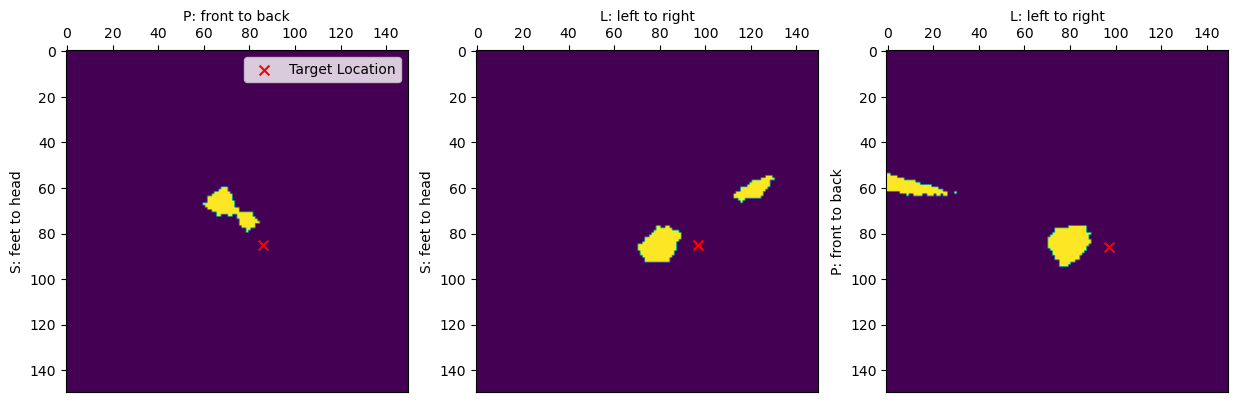

Ultrasound


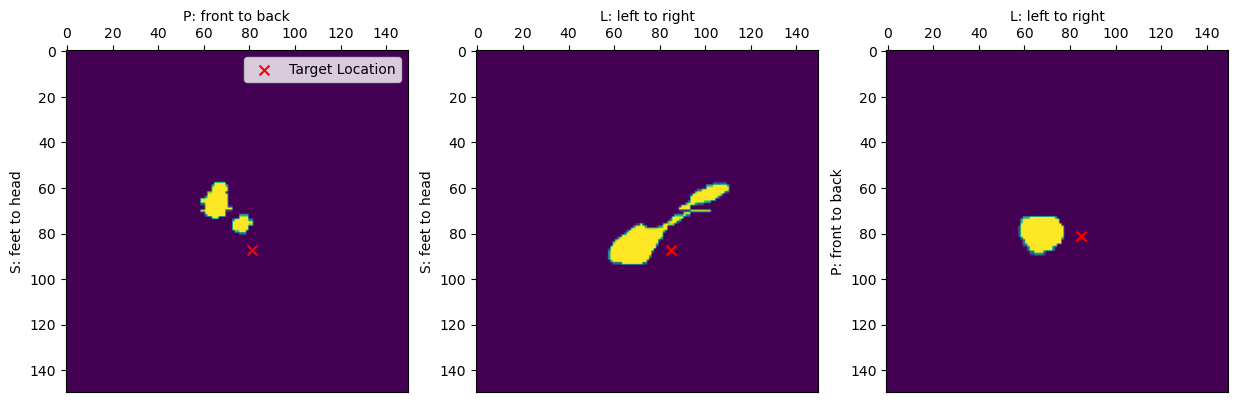

In [4]:
from scripts.Registration3D.registration import visualize_vessel,get_centroid_loc
target_loc_ct = get_centroid_loc(vessel_ct) + np.array([20,10,10])
pix = vessel_ct.TransformPhysicalPointToIndex(target_loc_ct)
print("CT")
visualize_vessel(vessel_ct,pix)

target_loc_us = CT2US.TransformPoint(target_loc_ct)
pix = vessel_us.TransformPhysicalPointToIndex(target_loc_us)
print("Ultrasound")
visualize_vessel(vessel_us,pix)